# Deep Learning in Medicine - Spring 2020
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex 

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit your final jupyter notebook with necessary files in <a href='http://newclasses.nyu.edu'>newclasses.nyu.edu</a>. If you use code or script from web, please give a link to the code in your answers. Not providing the reference of the code used will reduce your points!!

**Submission deadline: Friday March 24th 2019 (5:00 PM) --> No Extensions!!**

# Question 1: Convolutional Layer  (Total 20 points)

We have a 3x4x4 image (3 channels) and four 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions below, please provide the feature/activation maps requested, please provide the python code that you used to calculate the maps

<img src="q1_picture.png">

## 1.1) 
What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for

### 1.1.a) (1 point)
stride=1, without zero padding?

$ 4 \times 2 \times 2 $

### 1.1.b) (1 point) 
stride=2, padding = 2?

$ 4 \times 3 \times 3 $

### 1.1.c) (1 point)
stride=3, padding = 2?

$ 4 \times 2 \times 2 $

### 1.1.d) (1 point) 
a dilated convolution with stride=1, dilation rate=2 and zero padding?

$ 4 \times 4 \times 4 $

### 1.1.e) (1 point)
What should be the padding (p) for zero padding when stride=2?

3

## 1.2) (5 points)
Use the pytorch package to calculate feature/activation maps. Write a code which takes 3x4x4 image and performs a 2D convolution operation (with stride = 1 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leaky ReLU activation function (with negative slope 0.01) and Max-Pooling operation with required parameters to finally obtain output of dimension 4x1x1. Provide the code, feature maps obtained from convolution operation, activation maps, and feature maps after Max-Pooling operation.

**Hint:** You can refer to [AdaptiveMaxPool2d](https://pytorch.org/docs/stable/nn.html#adaptivemaxpool2d) to get desired dimension output from Pooling layer.

In [ ]:
# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
npzfile = np.load('Question1p2.npz') # 'Question1p2.npz' is provided in github repo
print(npzfile.files) # check the variable names
x = npzfile['x']
w = npzfile['w']
b = npzfile['b']

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
x_ = torch.FloatTensor(x).unsqueeze(0)
w_ = torch.FloatTensor(w)
b_ = torch.FloatTensor(b).unsqueeze(1).unsqueeze(2)
output = F.conv2d(x_,w_,padding=1).squeeze(0) + b_
print('Convolution Operation Feature Map:')
print(output)

ReLU_activation = nn.LeakyReLU(negative_slope=0.01)
output = ReLU_activation(output)
print('\nActivation Maps Feature Map:')
print(output)

MaxPooling = nn.AdaptiveMaxPool2d((1,1))
output = MaxPooling(output)
print('\nMax-Pooling Operation Feature Map:')
print(output)

Convolution Operation Feature Map:
tensor([[[  7.,   4.,   8.,  -8.],
         [  2.,   9.,  -9., -13.],
         [ -1.,  -7.,  -5.,  -8.],
         [ -6.,  -2., -15.,  -6.]],

        [[  2.,  -5.,  -3.,   0.],
         [ 16.,   5.,  -1.,  -4.],
         [ 18.,  21.,  17.,   8.],
         [  3.,  19.,  21.,   5.]],

        [[  8.,  -6.,   0., -12.],
         [  7.,  -9., -21.,   2.],
         [ 15.,   9.,   5., -18.],
         [  1., -13.,  -2.,   1.]],

        [[-11., -16., -14., -15.],
         [-11., -27., -28., -16.],
         [-27., -16., -19.,   4.],
         [ -8., -25.,  -2.,  -3.]]])

Activation Maps Feature Map:
tensor([[[ 7.0000e+00,  4.0000e+00,  8.0000e+00, -8.0000e-02],
         [ 2.0000e+00,  9.0000e+00, -9.0000e-02, -1.3000e-01],
         [-1.0000e-02, -7.0000e-02, -5.0000e-02, -8.0000e-02],
         [-6.0000e-02, -2.0000e-02, -1.5000e-01, -6.0000e-02]],

        [[ 2.0000e+00, -5.0000e-02, -3.0000e-02,  0.0000e+00],
         [ 1.6000e+01,  5.0000e+00, -1.0000e-02, -

## 1.3) (10 points)
Use the pytorch package to calculate feature/activation maps of a residual unit as depicted in Figure 2 of https://arxiv.org/pdf/1512.03385.pdf as well as on the figure above.

Input --> Convolution --> Activation --> Convolution --> Addition --> Activation

Write a code which takes 3x4x4 input image and performs two 2D convolution operations using the filters provided on the figure. Please use first three 3x3x3 filters for the Convolution layers. After the convolution layers and after the residual addition use ReLU activation function. Provide the code and feature maps obtained from each convolution operation, activation maps, and the last activation map obtained from the residual unit.

In [3]:
kernel = w_[:3]
bias = b_[:3]
output_0 = F.conv2d(x_,kernel,padding=1).squeeze(0) + bias
print('Convolution Feature Map:')
print(output_0)

ReLU_activation = nn.ReLU()
output_1 = ReLU_activation(output_0)
print('\nActivation Feature Map:')
print(output_1)

output_2 = F.conv2d(output_1.unsqueeze(0),kernel,padding=1).squeeze(0) + bias
print('\nConvolution_2 Feature Map:')
print(output_2)

output = x_ + output_2
print('\nAddition Feature Map:')
print(output)

output = ReLU_activation(output)
print('\nActivation_2 Feature Map:')
print(output)

Convolution Feature Map:
tensor([[[  7.,   4.,   8.,  -8.],
         [  2.,   9.,  -9., -13.],
         [ -1.,  -7.,  -5.,  -8.],
         [ -6.,  -2., -15.,  -6.]],

        [[  2.,  -5.,  -3.,   0.],
         [ 16.,   5.,  -1.,  -4.],
         [ 18.,  21.,  17.,   8.],
         [  3.,  19.,  21.,   5.]],

        [[  8.,  -6.,   0., -12.],
         [  7.,  -9., -21.,   2.],
         [ 15.,   9.,   5., -18.],
         [  1., -13.,  -2.,   1.]]])

Activation Feature Map:
tensor([[[ 7.,  4.,  8.,  0.],
         [ 2.,  9.,  0.,  0.],
         [ 0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.]],

        [[ 2.,  0.,  0.,  0.],
         [16.,  5.,  0.,  0.],
         [18., 21., 17.,  8.],
         [ 3., 19., 21.,  5.]],

        [[ 8.,  0.,  0.,  0.],
         [ 7.,  0.,  0.,  2.],
         [15.,  9.,  5.,  0.],
         [ 1.,  0.,  0.,  1.]]])

Convolution_2 Feature Map:
tensor([[[ -44.,   -7.,   35.,  -19.],
         [ -45.,   67.,   48.,   47.],
         [ -27.,  -68., -100.,  -41.],
 

# Question 2: Network design parameters for disease classification (Total 15 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of computed tomography (CTs). For each image, the dimension is 64x128x128 and we have the label for each image. The label of each image defines which class the image belongs (lets assume we have 4 different disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


In [4]:
# starter code
# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,64,128,128).normal_().type(torch.FloatTensor)

### 2.1.a) (2 points)
Design a multi layer perceptron (MLP) with a two hidden layer which takes an image as input (by reshaping it to a vector: lets call this a vectorized image). Our network has to first map the vectorized images to a vector of 512, then to 128 in the second hidden layer and finally feeds this vector to a fully connected layer to get the probability of 4 tissue classes. 

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

class Network(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(in_dim, n_hidden_1)
        self.layer2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.layer3 = nn.Linear(n_hidden_2, out_dim)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x),dim=1)
        return x

input_dim = 64*128*128
n_hidden_1 = 512
n_hidden_2 = 128
output_dim = 4
lr_rate = 0.01
model = Network(input_dim, n_hidden_1, n_hidden_2, output_dim)
loss = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr_rate)

In [6]:
input_data = x.view(x.size(0), -1)
model(input_data)

tensor([[0.2286, 0.2471, 0.2714, 0.2529],
        [0.2613, 0.2407, 0.2613, 0.2366],
        [0.2740, 0.2512, 0.2723, 0.2025],
        [0.2341, 0.2429, 0.2679, 0.2550],
        [0.2603, 0.2270, 0.2867, 0.2260],
        [0.2524, 0.2191, 0.3097, 0.2188],
        [0.2241, 0.2695, 0.2767, 0.2296],
        [0.2844, 0.2403, 0.2564, 0.2189]], grad_fn=<SoftmaxBackward>)

### 2.1.b) (2 points)
Clearly mention the sizes for your input and output at each layer until you get final output vector with 4 tissue classes in 64x128x128 voxels

First hidden layer:

   input size: $64\times128\times128=1048576$
    
   output size: $512$

Second hidden layer:

   input size: $512$
    
   output size: $128$

Output layer:

   input size: $128$
    
   output size: $4$

### 2.1.c) (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

Parameter numbers: $64\times128\times128\times512 + 512\times128 + 128\times4 + 512 + 128 + 4 = 536937604$

Parameter numbers for adding N neurons in third hidden layer:

$64\times128\times128\times512 + 512\times128 + 128\times N + N\times4 + 512 + 128 + N + 4$

In [7]:
print('Parameter numbers:',sum(p.numel() for p in model.parameters() if p.requires_grad))

Parameter numbers: 536937604


### 2.2.a) (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 256 (with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 4 disease classes.

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(1,32, 3, stride=1, padding=1),
            nn.AdaptiveMaxPool3d((2,2,2))
        )
        self.fc = nn.Sequential(
            nn.Linear(256, 4)
        )
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

lr_rate = 0.01
model = CNN()
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr_rate)

In [9]:
input_data = x
model(input_data)

tensor([[ 1.1948, -1.2213, -1.1666, -0.0759],
        [ 1.0055, -1.2176, -1.2595, -0.1320],
        [ 1.1027, -1.2946, -1.0657, -0.0876],
        [ 1.0119, -1.0024, -1.0669, -0.1431],
        [ 1.0916, -1.1834, -1.0931, -0.0825],
        [ 1.1655, -1.1828, -0.9962, -0.0985],
        [ 1.1979, -1.1636, -1.0656, -0.0802],
        [ 1.0932, -0.9595, -1.0431, -0.0802]], grad_fn=<AddmmBackward>)

### 2.2.b) (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 4 probabilities

input size: $1\times64\times128\times128$

kernel size: $3\times3\times3$ (stride=1, padding=1)

convolution layer output size: $32\times64\times128\times128$

pooling output size: $32\times2\times2\times2$

fully connected layer output size: $256$

final output size: $4$

### 2.2.c) (1 points) 
How many parameters you need to fit for your design?

Parameter numbers: $32\times3\times3\times3 + 32 + 256\times4 + 4 = 1924$

In [10]:
print('Parameter numbers:',sum(p.numel() for p in model.parameters() if p.requires_grad))

Parameter numbers: 1924


### 2.2.d) (2 points)
Now increase your selected convolution kernel size by 4 in each direction. Describe the effect of using small vs large filter size during convolution. 

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(1,32, 7, stride=1, padding=3),
            nn.AdaptiveMaxPool3d((2,2,2))
        )
        self.fc = nn.Sequential(
            nn.Linear(256, 4)
        )
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
model = CNN()
print('Parameter numbers:',sum(p.numel() for p in model.parameters() if p.requires_grad))

Parameter numbers: 12036


Large filter size gives more parameters in the model and takes more time to run.

## 2.3) (3 points)
Explain your findings regading different types of neural networks and building blocks based on your observations from 2.1 and 2.2. 

There are much more parameters in MLP model than CNN model.

# Question 3: Literature Review: ChestX-ray8 (Total 15 points)
Read this paper:

Pranav Rajpurkar, Jeremy Irvin, et al. 
CheXNet: Radiologist-Level Pneumonia Detection on Chest X-Rays with Deep Learning https://arxiv.org/abs/1711.05225


We are interested in understanding the task, the methods that is proposed in this paper, technical aspects of the implementation, and possible future work. After you read the full article answer the following questions. Describe you answers in your own words.  

## 3.1) (2 points) 
What type of learning algorithm is used (supervised, semi-supervised or unsupervised) for the classification? What is the reason for selecting this type of learning algorithm? 

Supervised learning. Because every sample image contains the thoracic pathology label.

## 3.2) (3 points)
What type of convolutional neural network architectures were used in the paper? How does transfer learning from these architectures achieved?

Dense Convolutional Network. The weights of the network are initialized with weights from a model pretrained on ImageNet.

## 3.3) (2 points)
What is the loss function? 

Weighted binary cross entropy loss.

## 3.4) (3 points)

Was the learning rate used changed during the training? Explain the situations where changing the learning rate is a good idea?

The initial learning rate is 0.001, and it is decayed by a factor of 10 each time the validation loss plateaus after an epoch.

## 3.5) (3 points)

What are the evaluation metrics used for model comparison in classification? Explain why those metrics were chosen?

F1 score and AUROC. Because the classification is a binary classification task, these metrics evaluate the models in both precision and recall.

## 3.6) (2 points)
Did the authors do any normalization to the data before feeding them to the model? If so, What's the purpose of doing so?

Before inputting the images into the network, the authors downscale the images to 224×224 and normalize based on the mean and standard deviation of images in the ImageNet training set.

Normalization can mitigate the influence of different gray scale among images.

# Question 4: Deep CNN design for disease classification (Total 45 points)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). You should be familiar with the dataset after answering Question 3.

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. Data is available in HPC under /beegfs/ga4493/data/HW2 folder. We are interested in classifying pneumothorax, cardiomegaly and infiltration cases. By saying so we have 3 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017.csv file to identify cases/images that has infiltration, pneumothorax, and cardiomegaly. This file can be downloaded from https://nihcc.app.box.com/v/ChestXray-NIHCC

## 4.1) Train, Test, and Validation Sets (2 points)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets (train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 3 classes:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, and 2)  by 70%, 10% and 20%, respectively. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [12]:
import pandas
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
df = pandas.read_csv('Data_Entry_2017.csv')
df = df.drop(columns=['Unnamed: 11'])
df = df.loc[(df['Finding Labels']=='Cardiomegaly') | (df['Finding Labels']=='Pneumothorax') |\
            (df['Finding Labels']=='Infiltration')]
encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Finding Labels'])
idx = np.arange(len(df))
np.random.seed(0)
np.random.shuffle(idx)
val_size = int(len(df)/10) # 10% validation
test_size = int(len(df)/5) # 20% test
train_size = len(df) - val_size - test_size
train_idx = idx[:train_size]
val_idx = idx[train_size:train_size+val_size]
test_idx = idx[train_size+val_size:]
train_df = df.iloc[train_idx,:]
val_df = df.iloc[val_idx,:]
test_df = df.iloc[test_idx,:]
train_df.head()
train_df.to_csv('train.csv', index = False)
val_df.to_csv('validation.csv', index = False)
test_df.to_csv('test.csv', index = False)

## 4.2) Data preparation before training
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under github repo for defining train, test and validation set samples instead of the csv files you generate on Question 4.1.


There are multiple ways of using images as an input during training or validation. Here, you will use torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). We provided the dataloader code below. Please explain what does following lines of code achieves in the data loader and propose alternatives.

### 4.2.a) (2 points) 

image = io.imread(img_name,as_gray=True)

Load image files.

from PIL import Image

image = np.asarray(Image.open(img_name))

### 4.2.b) (2 points) 

image = (image - image.mean()) / image.std()

Data Pre-processing: zero-center and normalization

image = (image - np.min(image))/(np.max(image) - np.min(image) + 1e-4)

In [13]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])

        image = io.imread(img_name,as_gray=True)
        
        image = (image - image.mean()) / image.std()
            
        image_class = self.data_frame.iloc[idx, -1]

        sample = {'x': image[None,:], 'y': image_class}

        if self.transform:
            sample = self.transform(sample)

        return sample

## 4.3) CNN model definition (6 points)
Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 3 convolutional layers, 3 residual units (similar to Figure 2 of https://arxiv.org/pdf/1512.03385.pdf) and a fully connected (FC) layer followed by a classification layer. Lets use 

-  3x3 convolution kernels (stride 1 in resnet units and stride 2 in convolutional layers)
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2 only after the convolutional layers. 

Define the number of feature maps in hidden layers as: 16, 16, 16, 32, 32, 32, 64, 64, 64, 128 (1st layer, ..., 10th layer). 

Input --> Convolution1 --> ResNetBlock1 --> Convolution2 --> ResNetBlock2 --> Convolution3 --> ResNetBlock3 --> FC --> Classification Layer


Write a class which specifies this network details. 

In [14]:
class Conv_model(nn.Module):
    def __init__(self):
        super(Conv_model,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, stride = 2, padding = 1)
        self.activation1_1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res1_1 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.activation1_2 = nn.ReLU()
        self.res1_2 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.activation1_3 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 1)
        self.activation2_1 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res2_1 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.activation2_2 = nn.ReLU()
        self.res2_2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.activation2_3 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2, padding = 1)
        self.activation3_1 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res3_1 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.activation3_2 = nn.ReLU()
        self.res3_2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.activation3_3 = nn.ReLU()
        
        self.fc1 = nn.Linear(16384,128)
        self.fc2 = nn.Linear(128,3)
        
    def forward(self, x):
        out = self.activation1_1(self.conv1(x))
        out = self.pooling1(out)
        residual = out
        out = self.activation1_2(self.res1_1(out))
        out = self.res1_2(out)
        out = out + residual
        out = self.activation1_3(out)
        
        out = self.activation2_1(self.conv2(out))
        out = self.pooling2(out)
        residual = out
        out = self.activation2_2(self.res2_1(out))
        out = self.res2_2(out)
        out = out + residual
        out = self.activation2_3(out)
        
        out = self.activation3_1(self.conv3(out))
        out = self.pooling3(out)
        residual = out
        out = self.activation3_2(self.res3_1(out))
        out = self.res3_2(out)
        out = out + residual
        out = self.activation3_3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [15]:
input_ = torch.Tensor(8,1,1024,1024).normal_().type(torch.FloatTensor)
model = Conv_model()
model(input_)

tensor([[-0.0532, -0.0390,  0.0517],
        [-0.0505, -0.0489,  0.0319],
        [-0.0567, -0.0361,  0.0670],
        [-0.0644, -0.0388,  0.0447],
        [-0.0561, -0.0320,  0.0752],
        [-0.0734, -0.0314,  0.0582],
        [-0.0394, -0.0206,  0.0508],
        [-0.0336, -0.0442,  0.0411]], grad_fn=<AddmmBackward>)

## 4.4) (2 points)
How many learnable parameters of this model has? How many learnable parameters we would have if we replace the fully connected layer with global average pooling layer (Take a look at Section 3.2 of https://arxiv.org/pdf/1312.4400.pdf)?  

In [16]:
print('Parameter numbers:',sum(p.numel() for p in model.parameters() if p.requires_grad))

Parameter numbers: 2217955


In [17]:
class Conv_model_2(nn.Module):
    def __init__(self):
        super(Conv_model_2,self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 3, stride = 2, padding = 1)
        self.activation1_1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res1_1 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.activation1_2 = nn.ReLU()
        self.res1_2 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.activation1_3 = nn.ReLU()
        
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 2, padding = 1)
        self.activation2_1 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res2_1 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.activation2_2 = nn.ReLU()
        self.res2_2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.activation2_3 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, stride = 2, padding = 1)
        self.activation3_1 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.res3_1 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.activation3_2 = nn.ReLU()
        self.res3_2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, stride = 1, padding = 1)
        self.activation3_3 = nn.ReLU()
        
        self.avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64,3)
        
    def forward(self, x):
        out = self.activation1_1(self.conv1(x))
        out = self.pooling1(out)
        residual = out
        out = self.activation1_2(self.res1_1(out))
        out = self.res1_2(out)
        out = out + residual
        out = self.activation1_3(out)
        
        out = self.activation2_1(self.conv2(out))
        out = self.pooling2(out)
        residual = out
        out = self.activation2_2(self.res2_1(out))
        out = self.res2_2(out)
        out = out + residual
        out = self.activation2_3(out)
        
        out = self.activation3_1(self.conv3(out))
        out = self.pooling3(out)
        residual = out
        out = self.activation3_2(self.res3_1(out))
        out = self.res3_2(out)
        out = out + residual
        out = self.activation3_3(out)
        
        out = self.avg_pooling(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
model = Conv_model_2()
print('Parameter numbers with global average pooling:',sum(p.numel() for p in model.parameters() if p.requires_grad))

Parameter numbers with global average pooling: 120483


## 4.5) Loss function and optimizer (2 points)
Define an appropriate loss criterion and an optimizer using pytorch. What type of loss function is applicable to our classification problem? Explain your choice of a loss function.  For an optimizer lets use Adam for now.

In [18]:
from torch import optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Cross entropy implies the difference between two probability distribution, cross entropy loss is suitable for multi-label classification task.

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achieve this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 4.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging!!!

## 4.6) Train the network on a subset (8 points)
Lets use a script to take random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. You used downsampling of images from 1024x1024 size to 64x64 in the Lab 4. This was fine for learning purpose but it will significantly reduce the infomation content of the images which is important especially in medicine. In this Homework, you MUST use original images of size 1024x1024 as the network input. 

In [19]:
# get samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.1, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 1    158
0     72
Name: Class, dtype: int64
Selected subset class frequencies
 1    20
0    13
Name: Class, dtype: int64


Use the random samples generated and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them empirically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~50 epochs) 

In [20]:
import time
device = torch.device('cuda')

train_df_path = 'HW2_randomTrainSet.csv'
val_df_path = 'HW2_randomValidationSet.csv'
transformed_dataset = {'train': ChestXrayDataset(train_df_path,'/beegfs/ga4493/data/HW2/images/'), \
                       'validate':ChestXrayDataset(val_df_path,'/beegfs/ga4493/data/HW2/images/')}
bs = 10
dataloader = {x: DataLoader(transformed_dataset[x], batch_size=bs, shuffle=True, num_workers=0) \
              for x in ['train', 'validate']}
data_sizes ={x: len(transformed_dataset[x]) for x in ['train', 'validate']}

def train_model(model, dataloader, optimizer, loss_fn, num_epochs = 10, verbose = False, scheduler=None):
    acc_dict = {'train':[],'validate':[]}
    loss_dict = {'train':[],'validate':[]}
    best_acc = 0
    phases = ['train','validate']
    since = time.time()
    for i in range(num_epochs):
        print('Epoch: {}/{}'.format(i, num_epochs-1))
        print('-'*10)
        for p in phases:
            running_correct = 0
            running_loss = 0
            running_total = 0
            if p == 'train':
                model.train()
            else:
                model.eval()
                
            for data in dataloader[p]:
                optimizer.zero_grad()
                image = data['x'].to(device,dtype=torch.float)
                label = data['y'].to(device,dtype=torch.long)
                output = model(image)
                loss = loss_fn(output, label)
                _, preds = torch.max(output, dim = 1)
                num_imgs = image.size()[0]
                running_correct += torch.sum(preds ==label).item()
                running_loss += loss.item()*num_imgs
                running_total += num_imgs
                if p== 'train':
                    loss.backward()
                    optimizer.step()
            epoch_acc = float(running_correct/running_total)
            epoch_loss = float(running_loss/running_total)
            if verbose or (i%10 == 0):
                print('Phase:{}, epoch loss: {:.4f} Acc: {:.4f}'.format(p, epoch_loss, epoch_acc))
            
            acc_dict[p].append(epoch_acc)
            loss_dict[p].append(epoch_loss)
            if p == 'validate':
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = model.state_dict()
            else:
                if scheduler:
                    scheduler.step()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model_wts)
    
    return model, acc_dict, loss_dict

In [21]:
model = Conv_model().to(device)
# weight initialization
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight,gain=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
model, acc_dict, loss_dict = train_model(model=model, dataloader=dataloader, optimizer=optimizer,\
                                         scheduler=None, loss_fn=criterion, num_epochs = 20, verbose = True)

Epoch: 0/19
----------
Phase:train, epoch loss: 0.9610 Acc: 0.6261
Phase:validate, epoch loss: 0.5814 Acc: 0.6667
Epoch: 1/19
----------
Phase:train, epoch loss: 0.5749 Acc: 0.6913
Phase:validate, epoch loss: 0.6037 Acc: 0.6667
Epoch: 2/19
----------
Phase:train, epoch loss: 0.5776 Acc: 0.7087
Phase:validate, epoch loss: 0.6768 Acc: 0.6061
Epoch: 3/19
----------
Phase:train, epoch loss: 0.5513 Acc: 0.6957
Phase:validate, epoch loss: 0.5970 Acc: 0.6364
Epoch: 4/19
----------
Phase:train, epoch loss: 0.5102 Acc: 0.7522
Phase:validate, epoch loss: 0.4851 Acc: 0.7576
Epoch: 5/19
----------
Phase:train, epoch loss: 0.4216 Acc: 0.7957
Phase:validate, epoch loss: 0.5563 Acc: 0.7879
Epoch: 6/19
----------
Phase:train, epoch loss: 0.2956 Acc: 0.8435
Phase:validate, epoch loss: 0.4773 Acc: 0.7879
Epoch: 7/19
----------
Phase:train, epoch loss: 0.2073 Acc: 0.9261
Phase:validate, epoch loss: 0.7693 Acc: 0.6667
Epoch: 8/19
----------
Phase:train, epoch loss: 0.1389 Acc: 0.9522
Phase:validate, epoch

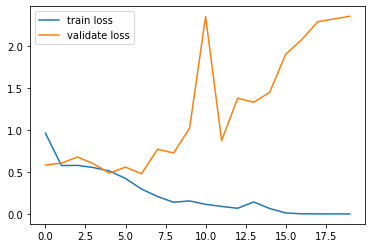

In [22]:
import matplotlib.pyplot as plt
train_loss = loss_dict['train']
validate_loss = loss_dict['validate']
train_acc = acc_dict['train']
validate_acc = acc_dict['validate']
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(validate_loss,label='validate loss')
ax.legend()
plt.show()

## 4.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from small subset of random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 10?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about empirical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

The network can learn from small subset of random samples. If the learning rate is multiplied by 10, the train loss will become large  at the beginning, and the accuracy of the model decrease.

Epoch: 0/19
----------
Phase:train, epoch loss: 86.8624 Acc: 0.6087
Phase:validate, epoch loss: 0.6680 Acc: 0.6061
Epoch: 1/19
----------
Phase:train, epoch loss: 0.6217 Acc: 0.6826
Phase:validate, epoch loss: 0.7150 Acc: 0.6061
Epoch: 2/19
----------
Phase:train, epoch loss: 0.6606 Acc: 0.6826
Phase:validate, epoch loss: 0.7572 Acc: 0.6061
Epoch: 3/19
----------
Phase:train, epoch loss: 0.6592 Acc: 0.6870
Phase:validate, epoch loss: 0.7021 Acc: 0.6061
Epoch: 4/19
----------
Phase:train, epoch loss: 0.6254 Acc: 0.6870
Phase:validate, epoch loss: 0.6807 Acc: 0.6061
Epoch: 5/19
----------
Phase:train, epoch loss: 0.6258 Acc: 0.6870
Phase:validate, epoch loss: 0.6892 Acc: 0.6061
Epoch: 6/19
----------
Phase:train, epoch loss: 0.6268 Acc: 0.6870
Phase:validate, epoch loss: 0.6862 Acc: 0.6061
Epoch: 7/19
----------
Phase:train, epoch loss: 0.6254 Acc: 0.6870
Phase:validate, epoch loss: 0.6826 Acc: 0.6061
Epoch: 8/19
----------
Phase:train, epoch loss: 0.6242 Acc: 0.6870
Phase:validate, epoc

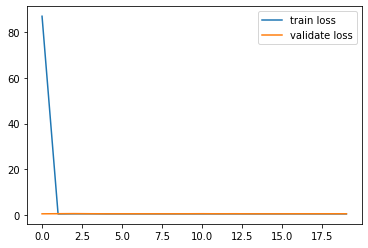

In [23]:
model = Conv_model().to(device)
# weight initialization
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight,gain=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
model, acc_dict, loss_dict = train_model(model=model, dataloader=dataloader, optimizer=optimizer,\
                                         scheduler=None, loss_fn=criterion, num_epochs = 20, verbose = True)
train_loss = loss_dict['train']
validate_loss = loss_dict['validate']
train_acc = acc_dict['train']
validate_acc = acc_dict['validate']
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(validate_loss,label='validate loss')
ax.legend()
plt.show()

## 4.8) Train the network on the whole dataset (6 points)
After question 4.7., you should have a network which has enough capacity to learn and you were able to debug your training code so that it is now ready to be trained on the whole dataset. Train your network on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

The model is overfitting. Batch normalization or dropout can help mitigate overfitting.

In [24]:
class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])

        image = io.imread(img_name,as_gray=True)
        
        image = (image - image.mean()) / image.std()
            
        image_class = self.data_frame.iloc[idx, -1]

        sample = {'x': image[None,:], 'y': image_class}

        if self.transform:
            sample = self.transform(sample)

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    encoder = LabelEncoder()
    data['Class'] = encoder.fit_transform(data['Finding Labels'])
    return data


train_df_path = 'HW2_trainSet_new.csv'
val_df_path = 'HW2_validationSet_new.csv'
test_df_path = 'HW2_testSet_new.csv'
transformed_dataset_1 = {'train': ChestXrayDataset(train_df_path,'/beegfs/ga4493/data/HW2/images/'), \
                       'validate': ChestXrayDataset(val_df_path,'/beegfs/ga4493/data/HW2/images/'), \
                       'test': ChestXrayDataset(test_df_path,'/beegfs/ga4493/data/HW2/images/')}
bs = 5
dataloader_1 = {x: DataLoader(transformed_dataset_1[x], batch_size=bs, shuffle=True, num_workers=0) \
              for x in ['train', 'validate','test']}
data_sizes_1 ={x: len(transformed_dataset_1[x]) for x in ['train', 'validate','test']}

In [25]:
model = Conv_model().to(device)
# weight initialization
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight,gain=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss() 
model_1, acc_dict, loss_dict = train_model(model=model, dataloader=dataloader_1, optimizer=optimizer,\
                                         scheduler=None, loss_fn=criterion, num_epochs = 50, verbose = True)

Epoch: 0/49
----------
Phase:train, epoch loss: 0.7676 Acc: 0.7416
Phase:validate, epoch loss: 0.7462 Acc: 0.7531
Epoch: 1/49
----------
Phase:train, epoch loss: 0.7442 Acc: 0.7425
Phase:validate, epoch loss: 0.7282 Acc: 0.7531
Epoch: 2/49
----------
Phase:train, epoch loss: 0.7384 Acc: 0.7425
Phase:validate, epoch loss: 0.7357 Acc: 0.7531
Epoch: 3/49
----------
Phase:train, epoch loss: 0.7394 Acc: 0.7421
Phase:validate, epoch loss: 0.7236 Acc: 0.7531
Epoch: 4/49
----------
Phase:train, epoch loss: 0.7369 Acc: 0.7425
Phase:validate, epoch loss: 0.7340 Acc: 0.7531
Epoch: 5/49
----------
Phase:train, epoch loss: 0.7358 Acc: 0.7425
Phase:validate, epoch loss: 0.7292 Acc: 0.7531
Epoch: 6/49
----------
Phase:train, epoch loss: 0.7389 Acc: 0.7423
Phase:validate, epoch loss: 0.7255 Acc: 0.7531
Epoch: 7/49
----------
Phase:train, epoch loss: 0.7408 Acc: 0.7425
Phase:validate, epoch loss: 0.7247 Acc: 0.7531
Epoch: 8/49
----------
Phase:train, epoch loss: 0.7345 Acc: 0.7424
Phase:validate, epoch

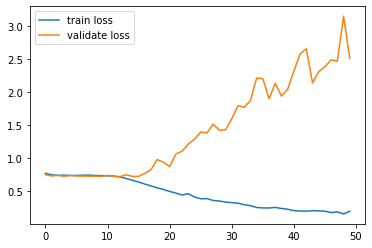

In [26]:
train_loss = loss_dict['train']
validate_loss = loss_dict['validate']
train_acc = acc_dict['train']
validate_acc = acc_dict['validate']
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(validate_loss,label='validate loss')
ax.legend()
plt.show()

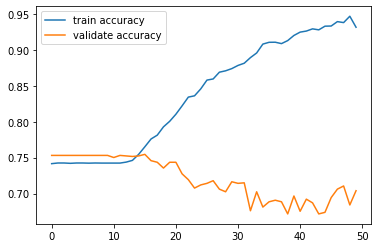

In [27]:
fig, ax = plt.subplots()
line1, = ax.plot(train_acc,label='train accuracy')
line2, = ax.plot(validate_acc,label='validate accuracy')
ax.legend()
plt.show() 

## 4.9) Experiments with Resnet18 (13 Points)

Let's use Resnet18 on our dataset and see how it performs. We can import the standard architectures directly using PyTorch's torchvison.models module. Refer to https://pytorch.org/docs/stable/torchvision/models.html to see all available models in PyTorch. You'll later, in this course, learn about a convenient and useful concept known as Transfer Learning. For now, we will  use the Resnet18 and train the architecture from scratch without any pre-training. Here is the link for the ResNet paper: https://arxiv.org/pdf/1512.03385.pdf 

### 4.9.1) (3 Points)
What is the reason of using 1x1 convolutions before 3x3 convolutions in the resnet architecture?

1x1 convolutions can decrease the number of channels and reduce computation in the following 3x3 convolutions.

### 4.9.2) Train the ResNet18 on the whole dataset (10 points)

We provide a new dataset class and a few additional transformations to the data for this new architecture. We have a new dataset class as ResNet18 architectures expect 3 channels in their primary input and other reasons which you'll later come to know - after the lecture on transfer learning. Nevertheless, for our case, we use them to reduce the required GPU usage as the Resnet18 architecture is significantly complex and GPU memory-intensive architecture than the CNN implemented above.

In [28]:
from torchvision import transforms
# torchvision models are trained on input images normalized to [0 1] range .ToPILImage() function achives this
# additional normalization is required see: http://pytorch.org/docs/master/torchvision/models.html

train_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomResizedCrop(896),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

validation_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(896),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

class ChestXrayDataset_ResNet(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = load_data_and_get_class(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        image = io.imread(img_name)
        if len(image.shape) > 2 and image.shape[2] == 4:
            image = image[:,:,0]
            
        image=np.repeat(image[None,...],3,axis=0)
            
        image_class = self.data_frame.iloc[idx, -1]

        if self.transform:
            image = self.transform(image)
            
        sample = {'x': image, 'y': image_class}

        return sample

def load_data_and_get_class(path_to_data):
    data = pd.read_csv(path_to_data)
    encoder = LabelEncoder()
    data['Class'] = encoder.fit_transform(data['Finding Labels'])
    return data

### 4.9.2.a) Architecture modification (6 points) 
In this question you need to develop a CNN model based on Resnet18 architecture. Please import the original ResNet18 model from PyTorch models (You can also implement this model by your own using the resnet paper). Modify the architecture so that the model will work with full size 1024x1024 image inputs and 3 classes of our interest:
- 0 cardiomegaly
- 1 pneumothorax
- 2 infiltration

Make sure the model you developed uses random weights!

In [29]:
import torchvision.models as models

model = models.resnet18(num_classes=3)
model = model.to(device)
# weight initialization
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        torch.nn.init.xavier_uniform_(m.weight,gain=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

### 4.9.2.b)Train the network on the whole dataset (4 points)
Similar to section 4.7. train the model you developed in section 4.9.2.a on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

The model is good fitting, and it is overfitting a little at the last 10 epoch. To mitigate overfitting in Resnet18 architecture, we can reduce the number of layers or apply dropout technique by randomly removing entire network layers during training(https://ieeexplore.ieee.org/abstract/document/7797032).

In [30]:
train_df_path = 'HW2_trainSet_new.csv'
val_df_path = 'HW2_validationSet_new.csv'
test_df_path = 'HW2_testSet_new.csv'
transformed_dataset_2 = {'train': ChestXrayDataset_ResNet(train_df_path,'/beegfs/ga4493/data/HW2/images/'), \
                       'validate': ChestXrayDataset_ResNet(val_df_path,'/beegfs/ga4493/data/HW2/images/'), \
                       'test': ChestXrayDataset_ResNet(test_df_path,'/beegfs/ga4493/data/HW2/images/')}
bs = 5
dataloader_2 = {x: DataLoader(transformed_dataset_2[x], batch_size=bs, shuffle=True, num_workers=0) \
              for x in ['train', 'validate','test']}
data_sizes_2 ={x: len(transformed_dataset_2[x]) for x in ['train', 'validate','test']}

model_2, acc_dict, loss_dict = train_model(model=model, dataloader=dataloader_2, optimizer=optimizer,\
                                         scheduler=None, loss_fn=criterion, num_epochs = 50, verbose = True)

Epoch: 0/49
----------
Phase:train, epoch loss: 0.7776 Acc: 0.7362
Phase:validate, epoch loss: 0.7786 Acc: 0.7531
Epoch: 1/49
----------
Phase:train, epoch loss: 0.7600 Acc: 0.7411
Phase:validate, epoch loss: 0.7203 Acc: 0.7531
Epoch: 2/49
----------
Phase:train, epoch loss: 0.7483 Acc: 0.7414
Phase:validate, epoch loss: 0.9567 Acc: 0.7032
Epoch: 3/49
----------
Phase:train, epoch loss: 0.7447 Acc: 0.7420
Phase:validate, epoch loss: 1.0796 Acc: 0.7531
Epoch: 4/49
----------
Phase:train, epoch loss: 0.7494 Acc: 0.7419
Phase:validate, epoch loss: 0.8166 Acc: 0.7458
Epoch: 5/49
----------
Phase:train, epoch loss: 0.7458 Acc: 0.7423
Phase:validate, epoch loss: 0.7237 Acc: 0.7531
Epoch: 6/49
----------
Phase:train, epoch loss: 0.7398 Acc: 0.7425
Phase:validate, epoch loss: 0.7197 Acc: 0.7531
Epoch: 7/49
----------
Phase:train, epoch loss: 0.7375 Acc: 0.7425
Phase:validate, epoch loss: 0.7465 Acc: 0.7531
Epoch: 8/49
----------
Phase:train, epoch loss: 0.7362 Acc: 0.7425
Phase:validate, epoch

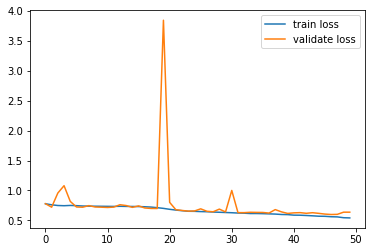

In [31]:
train_loss = loss_dict['train']
validate_loss = loss_dict['validate']
train_acc = acc_dict['train']
validate_acc = acc_dict['validate']
fig, ax = plt.subplots()
line1, = ax.plot(train_loss,label='train loss')
line2, = ax.plot(validate_loss,label='validate loss')
ax.legend()
plt.show()

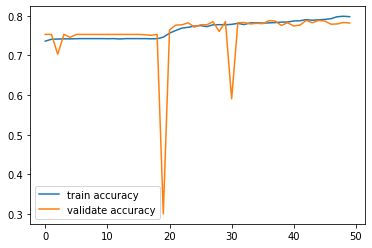

In [32]:
fig, ax = plt.subplots()
line1, = ax.plot(train_acc,label='train accuracy')
line2, = ax.plot(validate_acc,label='validate accuracy')
ax.legend()
plt.show()

# 5) Analysis of the results from two networks trained on the full dataset (Total 5 points + Bonus Question Maximum 5 points)
Use the validation loss to choose models from Q4.8 (model1) and Q4.9 (model2) (These models are trained on the full dataset and they learned from train data and generalized well to the validation set). 

## 5.1) Model selection by performance on test set (5 Points)
Using these models, plot confusion matrix and ROC curve for the disease classifier on the test set (HW2_TestSet.csv). Report AUC for this CNN model as the performance metric. You will have two confusion matrices and two ROC curves to compare model1 and model2

In [33]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 

# Example of how to plot ROC curves
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# Example of how to calculate confusion matrix
# https://www.kaggle.com/grfiv4/plot-a-confusion-matrix



Code of ROC_curve function :

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Code of plot_confusion_matrix function :

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, dataloader, phase = 'test'):   
    model.eval()
    y_test_label = []
    y_test = []
    y_score = []
    pre = []
    for data in dataloader[phase]:
        image = data['x'].to(device,dtype=torch.float)
        label = data['y'].to('cpu',dtype=torch.long)
        y_test_label = y_test_label+label.tolist()
        label = label_binarize(label, classes=[0, 1, 2])
        if y_test == []:
            y_test=label
        else:
            y_test = np.concatenate((y_test,label),axis = 0)
        output = model(image)
        #output = F.softmax(output,dim=1)
        output = output.to('cpu')
        if y_score == []:
            y_score=np.array(output.detach().numpy())
        else:
            y_score = np.concatenate((y_score,output.detach().numpy()),axis = 0)
    for i in y_score:
        pre.append(list(i).index(max(i)))
    return y_test_label,y_test,pre,y_score

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def ROC_curve(y_test,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    lw = 2
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()
    return None

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)
    #print(cm.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(-0.5, cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return None

Model 1


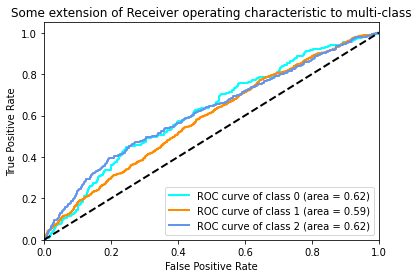

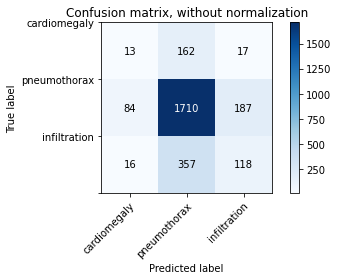

In [36]:
y_test_label,y_test,pre,y_score = evaluate_model(model_1, dataloader_1, phase = 'test')
print('Model 1')
ROC_curve(y_test,y_score)
classes = ['cardiomegaly','pneumothorax','infiltration']
plot_confusion_matrix(y_test_label, pre, classes)

Model 2


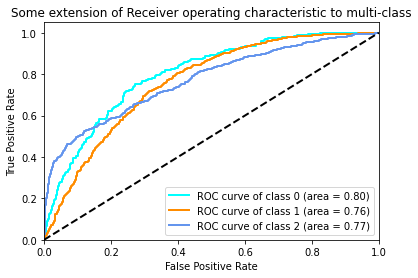

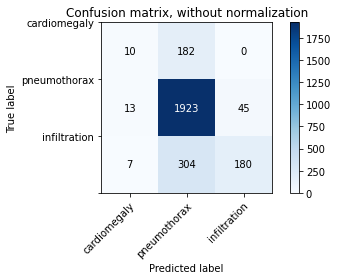

In [37]:
y_test_label,y_test,pre,y_score = evaluate_model(model_2, dataloader_2, phase = 'test')
print('Model 2')
ROC_curve(y_test,y_score)
classes = ['cardiomegaly','pneumothorax','infiltration']
plot_confusion_matrix(y_test_label, pre, classes)

## 5.2) Understanding the network ( Bonus Question maximum 5 points)

Using the best performing model (choose the model using the analysis you performed on Q5.1), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to occlude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [38]:
# You can use the code from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 
# with minor modifications


ResNet model is actually better from 5.1 result. But here I use Model 1 for visualization.

The AUROC of Model 1 is low, and in the heatmaps of Model 1, only the final sample has some overlap with pathologies box. It shows the model didn't learn well.

The code of make_heatmap function:

https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb

https://matplotlib.org/3.1.1/gallery/shapes_and_collections/compound_path.html

In [26]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb
# https://matplotlib.org/3.1.1/gallery/shapes_and_collections/compound_path.html
def make_heatmap(image, true_class, model, x, y, w, h, k=8, stride=8): 
    heatmap = torch.zeros(int(((image.shape[2]-k)/stride)+1), int(((image.shape[3]-k)/stride)+1))
    image = (image - image.mean()) / image.std()
    data = torch.autograd.Variable(torch.from_numpy(image)).type(torch.FloatTensor).to(device)
    i = 0
    a = 0
    while i<=image.shape[3]-k:
        j = 0 
        b = 0
        while j<=image.shape[2]-k:
            h_filter = torch.autograd.Variable(torch.ones(image.shape)).to(device)
            h_filter[:,:,j:j+k, i:i+k] = 0
            temp_image = data * h_filter
            temp_image = temp_image.to(device)
            temp_softmax = model(temp_image)
            temp_softmax = torch.nn.functional.softmax(temp_softmax,dim=1).data[0]
            heatmap[a][b] = temp_softmax[true_class]
            j += stride
            b += 1
        i += stride
        a += 1
    
    image = image.squeeze()
    true_image = image.transpose(0,1)
    
    plt.rcParams["figure.figsize"] = (10, 10)
    fig = plt.figure()
    
    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    vertices = []
    codes = []
    codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
    vertices = [(x, w), (y, w), (y, h), (x,h), (x, w)]
    vertices = np.array(vertices, float)
    path = Path(vertices, codes)
    pathpatch = PathPatch(path, facecolor='gray', edgecolor='gray')
    a.add_patch(pathpatch)
    plt.title('Original Image')
    plt.axis('off') 

    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off') 
    return heatmap

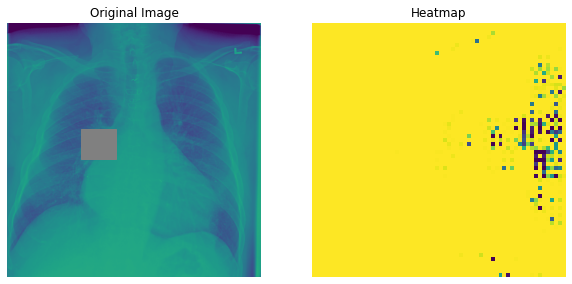

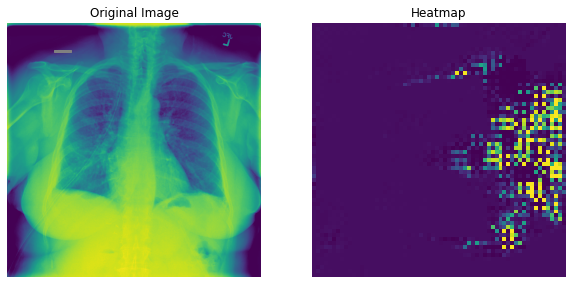

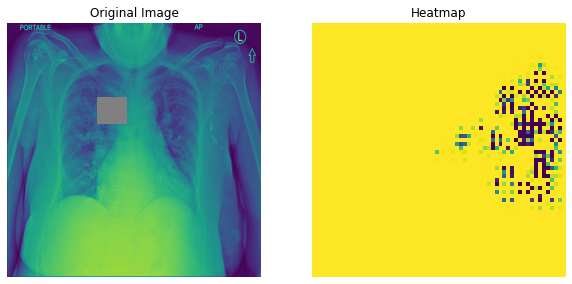

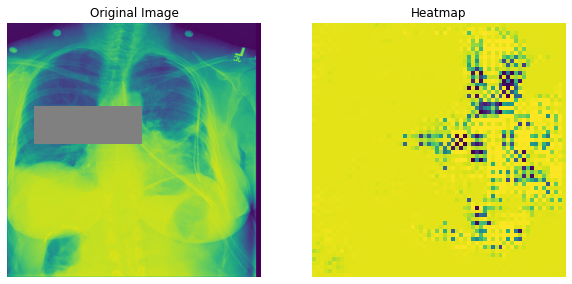

In [28]:
best_model = model_1
best_model.eval()
df = pd.read_csv('./HW2_visualize.csv')
for image_index in df.index:
    image_name  = df.loc[image_index]['Image Index']
    image_path = os.path.join('/beegfs/ga4493/data/HW2/images/', image_name)
    image = io.imread(image_path)
    image = image[np.newaxis,np.newaxis,:]
    label = df.loc[image_index]['Finding Label']
    if label == 'Cardiomegaly':
        true_class = 0
    if label == 'Pneumothorax':
        true_class = 1
    if label == 'Infiltration':
        true_class = 2
    x = df.loc[image_index]['Bbox [x']
    y = df.loc[image_index]['y']
    w = df.loc[image_index]['w']
    h = df.loc[image_index]['h]']
    make_heatmap(image, true_class, best_model, x, y, w, h, k=4, stride=16)